# <font color = red> *** FILL YOUR INFORMATION HERE *** </font>
Lauri Orava <br>
516761 <br>
laorav@utu.fi  <br>
11.11.2021  <br>

______________
# Data Analysis and Knowledge Discovery 2021 <br> Exercise 2, Data Understanding and Visualization

- This is the template for the second exercise. You can add more code and markup cells, as long as the flow of the notebook stays fluent and logical.

- The aim of this exercise is to practice data understanding; check the content and validity of the data, correct and select data, and apply basic descriptive statistics and visualization for further understanding.

- Two datasets are used: shipdata1_2021.csv and shipdata2_2021.csv. The same data will be used in the next exercise, with same attributes, but in a more cleaned format.<br> 

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

### Gather **all** packages needed for this notebook here:
- This does not mean that you can not use any packages not imported below, but the exercise can be done without importing any extras

In [160]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Show the plots inline in the notebook
%matplotlib inline

________

#  <font color = dimgrey> Know your data: an introduction to the data and domain knowledge </font>

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/

The exercise data has the following columns/attributes:
- **MMSI**

    * Maritime Mobile Service Identity. A radio-identification number that uniquely identifies a ship. The first three numbers tell the nationality of the ship - for example finnish ships would have the number 266 preceding them. The following six digits are the identifying part unique to each ship. <br> 
    
- **Speed**
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- **COG**
    * Course Over Ground<br> COG=3600 means “not available”
- **Destination**
    * The Destination of the subject vessel according to the AIS transmissions
- **Ship_type**
    * The Shiptype of the subject vessel according to AIS transmissions -
- **Gross_tonnage**
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- **Length**
    * The overall Length (in metres) of the subject vessel
- **Breadth**
    * The Breadth (in metres) of the subject vessel

________
## <font color = dimgrey> 1. Data import </font> 

Datasets for this exercise are available via the following url-paths
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv
_____________________

**a)** First load data files shipdata1.csv and shipdata2.csv using pandas.
-  *Note! Files were prepared by two different persons, so there are differences in the file formatting!*

In [161]:
# Here are the paths to the files
##################################
# Load shipdata1.csv
url1 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv' 
# Load shipdata2.csv
url2 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv'
#Print/show in notebook first 5 rows of both dataframes. 

In [162]:
# Your script for 1.a) here
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

**b)** Print/show in notebook first 5 rows of both dataframes. 

In [163]:
# Script here
print(df1.head(5))
print(df2.head(5))

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  212209000  10.1000  64.3000      Hamina     Cargo           3416    94.9   
1  212436000  13.5256  77.0755      Hamina    Tanker           6280   116.9   
2  219082000   9.9000  74.7000      Hamina    Tanker           9980   141.2   
3  219083000  11.6038  74.8000      Hamina    Tanker           9980   141.2   
4  219426000  11.9203  56.3253      Hamina    Tanker           3219    99.9   

   Breadth  
0     15.3  
1     18.0  
2     21.9  
3     21.6  
4     15.0  
        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11,3631  74,6552      Porvoo    Tanker          30641     195   
1  636016752     11,7     74,6      Porvoo    Tanker           3853    92,9   
2  244870429  11,7126  69,5662      Porvoo    Tanker           7251     115   
3  305653000  10,8253  56,4266      Porvoo     Cargo           6668  107,03   
4  235060255  11,7311     80,9    Primorsk    Tanker

**c)** For the vessel with **MMSI 231844000**, search for gross tonnage, length and breadth from one of the datasets 

In [164]:
# Script here
vessel = df1.loc[df1['MMSI'] == 231844000]
print(vessel[['MMSI', 'Gross_tonnage', 'Length', 'Breadth']])


         MMSI  Gross_tonnage  Length  Breadth
49  231844000           2876    88.9     13.2


_________
## <font color = dimgrey> 2. Fix numeric data

**a)** The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

The first dataframe uses periods as dots while the second dataframe uses commas as dots. The rounding of values is also different. This is because the datatypes are different.

**b)** Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [165]:
# Script here
df2["Speed"] = df2["Speed"].str.replace(',','.').astype(float)
df2["COG"] = df2["COG"].str.replace(',','.').astype(float)
df2["Length"] = df2["Length"].str.replace(',','.').astype(float)
df2["Breadth"] = df2["Breadth"].str.replace(',','.').astype(float)

**c)** Print first 5 rows of  the now fixed  shipdata2 dataframe. 

In [166]:
# Script here
print(df2.head(5))

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11.3631  74.6552      Porvoo    Tanker          30641  195.00   
1  636016752  11.7000  74.6000      Porvoo    Tanker           3853   92.90   
2  244870429  11.7126  69.5662      Porvoo    Tanker           7251  115.00   
3  305653000  10.8253  56.4266      Porvoo     Cargo           6668  107.03   
4  235060255  11.7311  80.9000    Primorsk    Tanker          23353  184.00   

   Breadth  
0    32.24  
1    15.30  
2    18.60  
3    18.42  
4    27.70  


__________
## <font color = dimgrey> 3. Combine dataframes together

*Tip for this section: Each subtask can be easily done with one (or two) line(s) of code when using Pandas.*

**a)** Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [167]:
# Script here
df1 = df1.assign(Origin=1)
df2 = df2.assign(Origin=2)

**b)** Combine the two separate dataframes as one new dataframe.

In [168]:
# Script here
temp = [df1, df2]
print(df1)
df = pd.concat(temp)

         MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0   212209000  10.1000  64.3000      Hamina     Cargo           3416    94.9   
1   212436000  13.5256  77.0755      Hamina    Tanker           6280   116.9   
2   219082000   9.9000  74.7000      Hamina    Tanker           9980   141.2   
3   219083000  11.6038  74.8000      Hamina    Tanker           9980   141.2   
4   219426000  11.9203  56.3253      Hamina    Tanker           3219    99.9   
..        ...      ...      ...         ...       ...            ...     ...   
64  259768000  11.8492  80.3430      Porvoo    Tanker          11935   144.1   
65  538002774  11.5935  67.3823      Porvoo    Tanker          30641   195.0   
66  538002778  11.3631  74.6552      Porvoo    Tanker          30641   195.0   
67  636016683  10.9000  75.4000      Porvoo    Tanker           5440   108.0   
68  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   

    Breadth  Origin  
0     15.30      

**c)** Check a sample of the new dataframe by taking a random sample of six rows and printing it.

In [169]:
# Script here
df.sample(6)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
40,210319000,9.0000,73.7000,Valko-Loviisa,Cargo,1616,82.5,11.50,2
66,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.0,32.24,1
61,255714000,13.2697,60.3354,Porvoo,Tanker,3785,100.0,17.00,1
19,230961000,7.2000,73.7000,Tallinn,Tug,256,32.9,9.00,2
8,636015565,12.4056,81.3492,Primorsk,Tanker,66855,249.9,46.00,2
27,255801580,13.6877,57.4511,Kotka,Cargo,11596,125.5,18.80,1


**d)** Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [170]:
# Script here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 66
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 10.6+ KB


How many columns and rows can be found in the dataframe, what kind of datatypes are found, how many null values can be found.

__________
## <font color = lightcoral> 4. Data cleaning

**a)** Check if there are any missing data.

In [171]:
# Script here
df.isnull().sum()

MMSI             0
Speed            0
COG              0
Destination      0
Ship_type        1
Gross_tonnage    0
Length           0
Breadth          0
Origin           0
dtype: int64

**b)** Check if there any duplicate data; any vessel in the dataframe several times?

In [172]:
# Script here
df.duplicated(['MMSI']).sum()

2

**c)** Resolve missing data and remove duplicate data.

In [173]:
# Script here
df.dropna(inplace=True)

df.drop_duplicates(['MMSI'], inplace=True, ignore_index=True)

**d)** Print out proof that there are no more missing or duplicate data

In [174]:
# Script here
df.isnull().sum()

df.duplicated(['MMSI']).sum()

0

____________
## <font color = Navy> 5. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [175]:
# Script here
df['MMSI'] = df['MMSI'].astype(str)
df['Gross_tonnage'] = df['Gross_tonnage'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           133 non-null    object 
 1   Speed          133 non-null    float64
 2   COG            133 non-null    float64
 3   Destination    133 non-null    object 
 4   Ship_type      133 non-null    object 
 5   Gross_tonnage  133 non-null    float64
 6   Length         133 non-null    float64
 7   Breadth        133 non-null    float64
 8   Origin         133 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 9.5+ KB


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 
- *This can be done with one line - if your answer gets long consider changing your approach.*

In [176]:
# Script here
df.describe()

,Speed,COG,Gross_tonnage,Length,Breadth,Origin
count,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000
mean,10.456415,78.298808,13599.62406,127.178571,20.212932,1.481203
std,1.962428,15.788205,18488.17812,57.793138,9.976906,0.501536
min,5.500000,53.326400,100.00000,15.000000,5.000000,1.000000
25%,8.948700,70.970800,2548.00000,88.900000,12.900000,1.000000
50%,10.300000,74.900000,5440.00000,115.000000,16.900000,1.000000
75%,11.712600,81.349200,15633.00000,159.970000,25.240000,2.000000
max,17.082500,157.267300,81502.00000,274.000000,48.040000,2.000000


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes. Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [177]:
# Script here
df.describe()

,Speed,COG,Gross_tonnage,Length,Breadth,Origin
count,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000
mean,10.456415,78.298808,13599.62406,127.178571,20.212932,1.481203
std,1.962428,15.788205,18488.17812,57.793138,9.976906,0.501536
min,5.500000,53.326400,100.00000,15.000000,5.000000,1.000000
25%,8.948700,70.970800,2548.00000,88.900000,12.900000,1.000000
50%,10.300000,74.900000,5440.00000,115.000000,16.900000,1.000000
75%,11.712600,81.349200,15633.00000,159.970000,25.240000,2.000000
max,17.082500,157.267300,81502.00000,274.000000,48.040000,2.000000


It makes sense to get means and standard deviations and every other value from speed, gross tonnage, length and breadth. It doesn't make sense to get these values from COG nor from Origin.


**c)** Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these **but leave out everything else except mean, std and max**. 

- *Tip: check the type of the output of the function you used in the last step. What is the type and how could you subset it? What did you learn about pandas indexing in the first exercise?*

In [178]:
# Script here
df_desc = df.describe()[['Breadth','Length', 'Gross_tonnage']]
df_desc.drop(['count', 'min', '25%', '50%', '75%'], inplace=True)
print(df_desc)

        Breadth      Length  Gross_tonnage
mean  20.212932  127.178571    13599.62406
std    9.976906   57.793138    18488.17812
max   48.040000  274.000000    81502.00000


 **d)** Descriptive statistics by Ship_type <br>
- Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br> 
"by" here means that you group by that variable.
- *Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.*<br>

In [179]:
# Script here
print(df.groupby(['Ship_type']).describe()[['Breadth','Length', 'Gross_tonnage']].transpose())

Ship_type                   Cargo        Tanker         Tug
Breadth       count     67.000000     57.000000    9.000000
              mean      16.841493     26.023509    8.511111
              std        5.984697     11.045589    1.749603
              min       10.500000      8.100000    5.000000
              25%       12.500000     16.900000    7.500000
              50%       14.400000     22.200000    9.000000
              75%       18.750000     32.200000    9.800000
              max       32.310000     48.040000   10.500000
Length        count     67.000000     57.000000    9.000000
              mean     111.993582    160.599649   28.555556
              std       37.235145     57.076156    6.070031
              min       64.200000     46.900000   15.000000
              25%       87.870000    117.800000   26.800000
              50%      100.000000    144.100000   31.000000
              75%      123.750000    195.000000   32.900000
              max      229.040000    274

**e)** How many ship types there are? Which Ship type has the largest breadth?

Three ship types. Tankers have the largest average breadth.

_______________
## <font color = forestgreen> 6. Visualizations </font>

### A few more words on matplotlib and seaborn

As you saw in the first exercise, matplotlib plotting is structured with the 'axes' and 'figure' objects. The meaning and the names of these can be somewhat confusing so here is a small example and explanation of them to avoid confusion in the future. This small explanation tries to help you avoid common mistakes and frustration. 
    
- The **<font color = dimgrey> figure </font>** object contains all plotting elements, in other words everything we see. You can think of it as a canvas where things are drawn. 
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can even overlap and their position is defined relative to the figure. 
    
####  Seaborn and matplotlib
- Seaborn goes together with matplotlib, and can be thought to be an extension of it, but there are some things that can confuse you along the way if their relationship is presented like this. One tip in particular that one might have problems with is that in seaborn there are figure-level, axes-level plots. Figure level plots dont work with a matplotlib subplot and are used so that only one plot is made per figure. Axes level plots can be put into subplots like matplotlib plots as you saw in the first exercise. 
    
    
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise" </font>. You can for example try to make a similar plot-inside-plot with the exercise data.
    

In [180]:
#Lets make some example data.
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

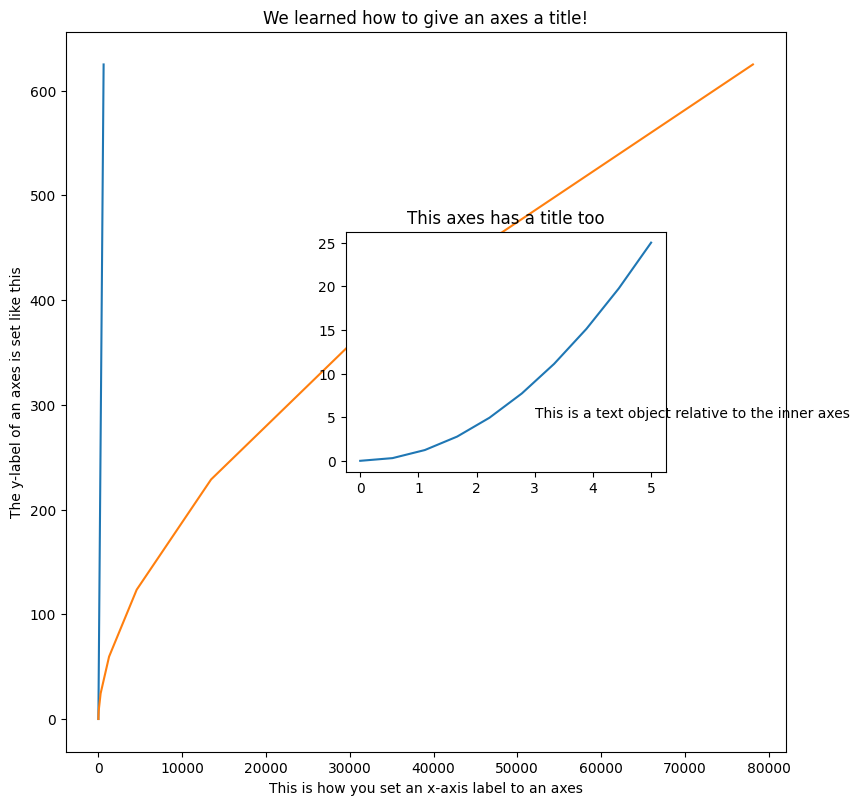

In [181]:
### Make the figure and axes objects ###
example_figure = plt.figure(figsize =(8,8), dpi = 100) #you give the size of the figure as a tuple of inches
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #The list argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.plot(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

_________
## <font color = Green> 7. Visualizing attribute value distributions </font>
**a)** Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Do you think this a feasible attribute for classification, why? 

- Tip: it would be nice to use subplots when you have more than one plot. 

Text(0.5, 1.0, 'Breadths of tugboats with square root method')

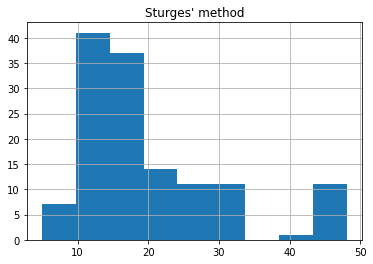

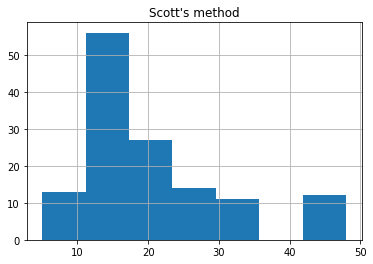

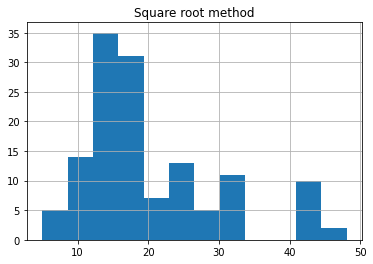

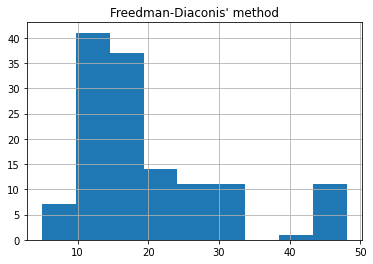

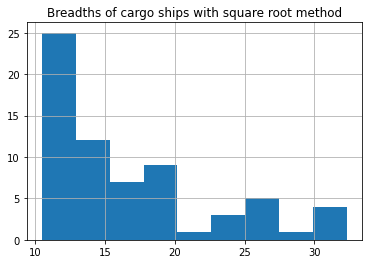

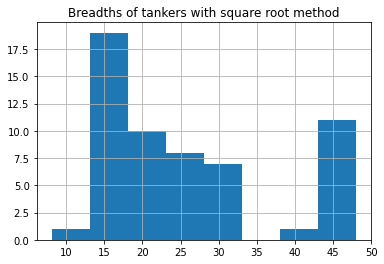

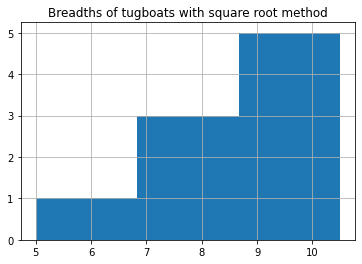

In [182]:
# Script here
df.hist(['Breadth'], bins='sturges')
plt.title("Sturges' method")

df.hist(['Breadth'], bins='scott')
plt.title("Scott's method")

df.hist(['Breadth'], bins='sqrt')
plt.title("Square root method")

df.hist(['Breadth'], bins='fd')
plt.title("Freedman-Diaconis' method")

df_cargo = df[df.Ship_type == 'Cargo']
df_tanker = df[df.Ship_type == 'Tanker']
df_tug = df[df.Ship_type == 'Tug']

df_cargo.hist(['Breadth'], bins='sqrt')
plt.title("Breadths of cargo ships with square root method")

df_tanker.hist(['Breadth'], bins='sqrt')
plt.title("Breadths of tankers with square root method")

df_tug.hist(['Breadth'], bins='sqrt')
plt.title("Breadths of tugboats with square root method")



Bins are groups of data points with the same value, and histograms display numerical data by using bins. There are multiple methods for calculating the optimal amount of bins and optimal bin width used to reveal hidden meaning in data for analysis, and to filter unnecessary noise in numerical data.

Sturges' method: optimal bins k = ceiling(log2(n) + 1), where n is sample size

Scott's method: optimal bin width h = (3.5*s) / (n^(1/3)), where s is std

Square root method: k = sqrt(n)

Freedman-Diaconis' method: h = 2*((IQR) / (n^(1/3))), where IQR is the interquartile range

**b)** Compare the distributions of the Breath variable between different ship types. Do you think this a feasible attribute for classification, why?
- *Tip What kind of plot can you do on a continuous variable? You only need to produce one plot, not multiple.*

In [183]:
# Script here


**c)**	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Do you see outliers that require some action?

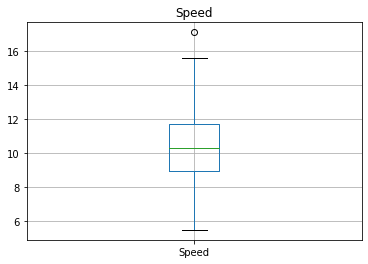

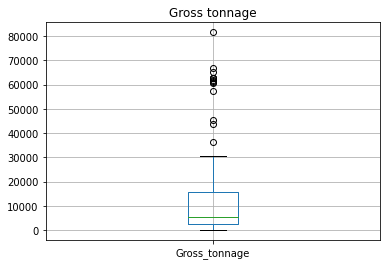

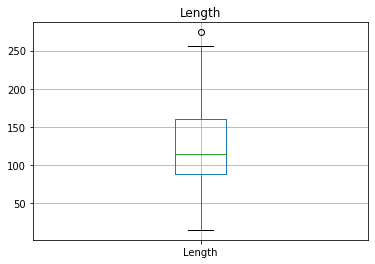

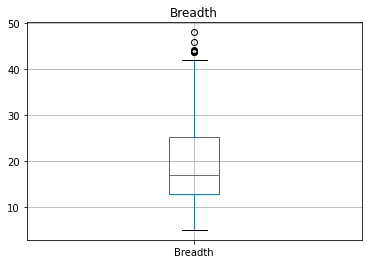

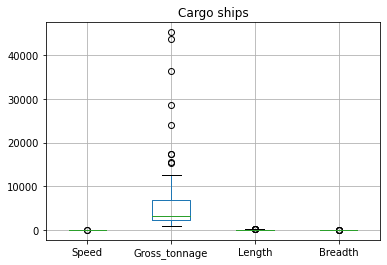

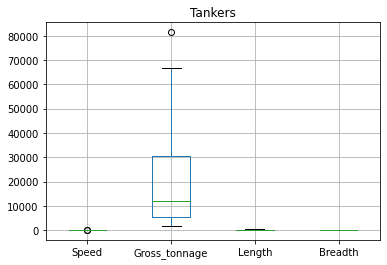

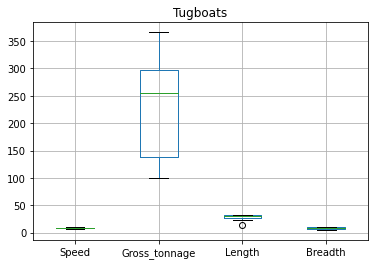

<Figure size 432x288 with 0 Axes>

In [184]:
# Script here

plt.figure()

df.boxplot(column=['Speed'])
plt.title("Speed")
plt.show()
plt.clf()

df.boxplot(column=['Gross_tonnage'])
plt.title("Gross tonnage")
plt.show()
plt.clf()

df.boxplot(column=['Length'])
plt.title("Length")
plt.show()
plt.clf()

df.boxplot(column=['Breadth'])
plt.title("Breadth")
plt.show()
plt.clf()

df_cargo.boxplot(column=['Speed', 'Gross_tonnage', 'Length', 'Breadth'])
plt.title("Cargo ships")
plt.show()
plt.clf()

df_tanker.boxplot(column=['Speed', 'Gross_tonnage', 'Length', 'Breadth'])
plt.title("Tankers")
plt.show()
plt.clf()

df_tug.boxplot(column=['Speed', 'Gross_tonnage', 'Length', 'Breadth'])
plt.title("Tugboats")
plt.show()
plt.clf()

A boxplot is a plot that gives a view on the distribution of the data over quartiles. Median is shown as a black line, the 25% and 75% quartiles in a box and then the previously mentioned interquartile range range (IQR = 1.5 * (75% - 25% quartiles)). IQR is represented as lines on top of and under the box. Any data points that don't fit are considered outliers and marked as dots on the plot.

From these boxplots the Origin attribute has been excluded, but also the COG attribute, since as a numerical attribute it really doesn't reveal anything about our ships.

A lot of outliers can be found on gross tonnage especially when only looking at cargo ships. A few can also be found in speed, length and breadth, but only few. However, no outlier is so far from the box that no data cleaning action is required in my opinion.

Box plotting all attributes for any ship type whilst having gross tonnage included makes the plot hard to analyze due to sheer scale of the gross tonnage attribute values.


##  <font color = purple> 8. Relationships between attributes

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 
- *this can be done in one line*

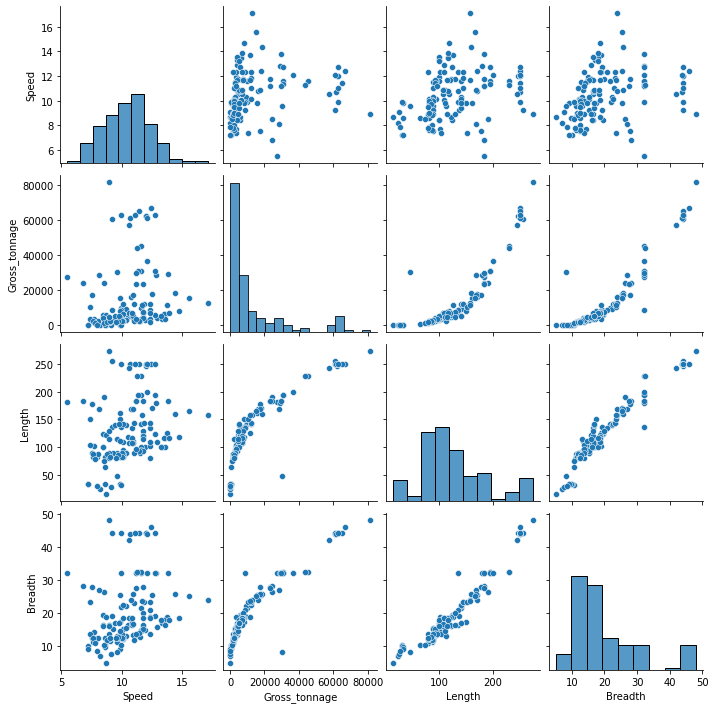

In [185]:
# Script here
df_new = df.drop(['COG', 'Origin'], axis=1)
sns.pairplot(df_new)

Attributes that clearly indicate the size of the ship have obvious connections. These are gross tonnage + length, gross tonnage + breadth and length + breadth.

One possible outlier can be found in the cross tonnage + breadth graphs.

**b)** Make a new clean dataframe without outlier(s) and replot. What difference do you see? 
- *include the most relevant attributes only, or limit to those needed in next task*

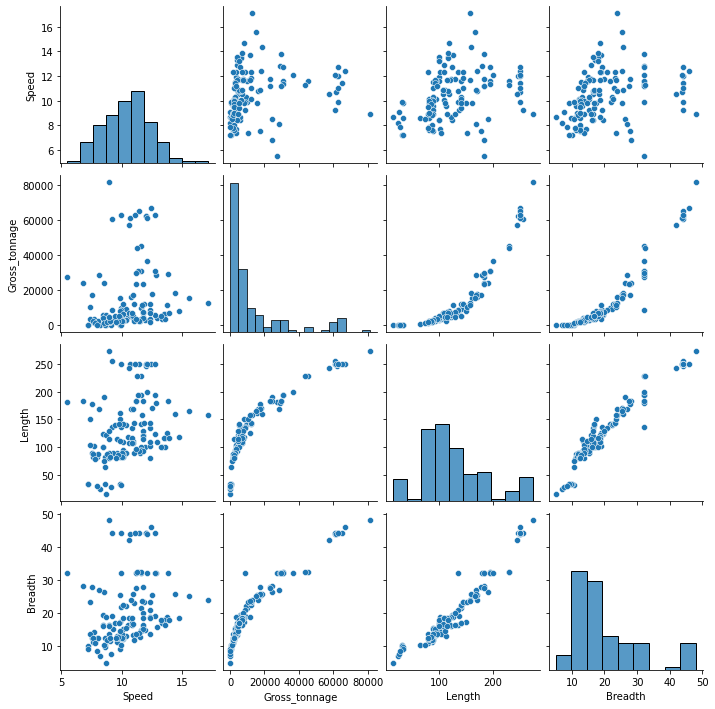

In [186]:
# Script here
df_filtered = df_new.drop(df_new[(df_new['Gross_tonnage'] > 20000) & (df_new['Breadth'] < 10)].index)
sns.pairplot(df_filtered)

I don't think any data should be removed from the set so I'm using a temporary dataframe with the tag filtered to demonstrate this exercise. I don't have enough knowledge about ships to determine whether these outliers are actual real ships.Therefore it would be unwise to exclude them from the data frame, since if they are real ships, they represent real life data.

There doesn't seem to be any mistakes in the data set(s) used.

__________
## <font color = purple> 9. Correlation and heatmap </font>

**a)** Explain what are
- Pearson's correlation
- Spearman's rho and 
- Kendall's tau?

A covariance matrix is calculated from the different features of the data. For example, now that we have four numerical attributes in out dataframe, the correlation matrix M is 4x4. All diagonal elements are 1, since the correlation between two same sets is one.

Pearsons's correlation is the covariance divided by the product of the standard deviations sx sy. This normalizes the values between -1 and 1. Pearson's correlation matrix values tells us, how close of a linear relationship there is two data sets.

Spearman's rho (p) is defined as 
p = 1 - (6*sum r(xi)-r(yi) from i = 0 to n) /  (n(n^2-1))
The r(xi) is the rank of value xi when we sort the list in increasing order
(x1, ... , xn)
This measures the relations between the ordering of the values and thus doesn't only measure linearly.

Kendall's tau is defined as
T = (C-D) / (0.5n(n-1))
where C is the number of concordant pairs (xi < xj then yi < yj)
and D is the number of discordant pairs (if xiyj)
(0.5n(n-1)) is the total number of pairs and thus the Kendall's tau gives us the "fraction" of pairs that are concordant. 
Unlike in the the other two, only the absolute value of tau matters,
i.e. -1 != unrelated lists.
They are related but in a way that the relation would be perfect if we just reversed the other list.


**b)** Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? You can use a heatmap to visualize the matrices and more easily see the strength of the relationship. **See what kind of a difference there is between the cleaned dataset and the non-cleaned dataset.**

Pearson's correlation:


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.198906,0.308908,0.297894
Gross_tonnage,0.198906,1.000000,0.892320,0.937849
Length,0.308908,0.892320,1.000000,0.964356
Breadth,0.297894,0.937849,0.964356,1.000000


Pearson's correlation for the cleaned dataset:


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.202624,0.306770,0.295732
Gross_tonnage,0.202624,1.000000,0.911205,0.954331
Length,0.306770,0.911205,1.000000,0.964007
Breadth,0.295732,0.954331,0.964007,1.000000


Heatmap for the Pearson matrix with cleaned dataset:


<AxesSubplot:>

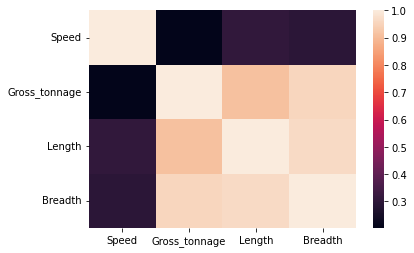

In [187]:
#Pearson's
print("Pearson's correlation:")
display(df_new.corr(method='pearson'))
print("Pearson's correlation for the cleaned dataset:")
display(df_filtered.corr(method='pearson'))
print("Heatmap for the Pearson matrix with cleaned dataset:")
display(sns.heatmap(df_filtered.corr(method='pearson')))


Spearman's rho:


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.445950,0.404894,0.458942
Gross_tonnage,0.445950,1.000000,0.952372,0.951953
Length,0.404894,0.952372,1.000000,0.967081
Breadth,0.458942,0.951953,0.967081,1.000000


Spearman's rho for the cleaned dataset:


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.455025,0.401185,0.456648
Gross_tonnage,0.455025,1.000000,0.980322,0.983340
Length,0.401185,0.980322,1.000000,0.966442
Breadth,0.456648,0.983340,0.966442,1.000000


Heatmap for the Spearman's rho with cleaned dataset:


<AxesSubplot:>

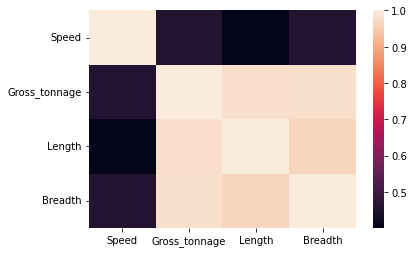

In [188]:
#Spearman's
print("Spearman's rho:")
display(df_new.corr(method='spearman'))
print("Spearman's rho for the cleaned dataset:")
display(df_filtered.corr(method='spearman'))
print("Heatmap for the Spearman's rho with cleaned dataset:")
display(sns.heatmap(df_filtered.corr(method='spearman')))

Kendall's tau:


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.314177,0.283438,0.321758
Gross_tonnage,0.314177,1.000000,0.874323,0.888367
Length,0.283438,0.874323,1.000000,0.866917
Breadth,0.321758,0.888367,0.866917,1.000000


Kendall's tau for the cleaned dataset:


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.320911,0.281343,0.320707
Gross_tonnage,0.320911,1.000000,0.896770,0.912503
Length,0.281343,0.896770,1.000000,0.866267
Breadth,0.320707,0.912503,0.866267,1.000000


Heatmap for Kendall's tau with cleaned dataset:


<AxesSubplot:>

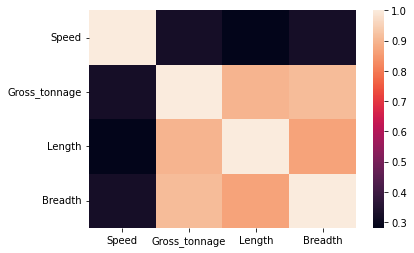

In [189]:

#Kendall's
print("Kendall's tau:")
display(df_new.corr(method='kendall'))
print("Kendall's tau for the cleaned dataset:")
display(df_filtered.corr(method='kendall'))
print("Heatmap for Kendall's tau with cleaned dataset:")
display(sns.heatmap(df_filtered.corr(method='kendall')))

As noticed below, the correlation between attributes that indicate ship size is strong. However, we can also notice that speed does not relate to the ship size at all.

Slight differences between each matrices can be seen after taking out the interesting low breadth but high gross tonnage ship outlier ship.

Overall the ship dataset shows us results that make sense and are expected. Ships with high breadth and more length usually have higher gross tonnage (internal volume). The ships speeds won't tell us much about the ships, since they probably have to follow some speed limits, at least near the coast.

____________
## <font color = dollargreen >   10. BONUS Dimensionality reduction</font>  
- <font color = red> Answers that only state what you can see are not enough. </font> You need to explain _why_ rather than what and demonstrate you understand what you are doing. By copypasting code from stackoverflow you will not learn much.
____________

- **a)** Explain what principal component analysis is.

<font color = red> \*** Answer here *** </font>

- **b)** Do it with and without z-score standardization. 

In [190]:
# Script: PCA with z-score standardization

In [191]:
# Script: PCA without z-score standardization

- **c)** Visualize the results with a scatter plot by projecting the data to the first two principal components.

In [192]:
# Script: Plot principal components

- **d)** How much of the variation is explained with the two principal components? What do you think this means? Where does the variation come from? 

In [193]:
# Script: Explore variation

<font color = red> \*** Answer here *** </font>